In [1]:
SQL_SOURCE = 'https://vjs306.carto.com/api/v2/sql?q='

import urllib2
import urllib
import StringIO
import ast
import pandas as pd

from IPython.display import Image

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    '''queries carto datasets from a given carto account
    Arguments: 
    query - string: a valid sql query string
    format - outlut format  OPTIONAL (default CSV)
    source - a valid sql api endpoint OPTIONAL (default carto fb55 account)
    Returns:
    the return of the sql query AS A STRING
    NOTES:
    designed for the carto API, tested only with CSV return format'''
    
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return response.read()

In [2]:
sQuery = '''
SELECT *
FROM citibike
'''

In [3]:
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery)), sep=',')

cartodb_id  the_geom  the_geom_webmercator  gender  birth_year  bikeid  \
0            5960       NaN                   NaN       1      1965.0   19217   
1            9806       NaN                   NaN       1      1971.0   17575   
2           13113       NaN                   NaN       1      1973.0   20313   
3               1       NaN                   NaN       2      1978.0   17131   
4               2       NaN                   NaN       1      1993.0   21289   
5               3       NaN                   NaN       2      1969.0   18903   
6               4       NaN                   NaN       2      1985.0   21044   
7               5       NaN                   NaN       1      1957.0   19868   
8               6       NaN                   NaN       1      1979.0   15854   
9               7       NaN                   NaN       1      1983.0   15173   
10              8       NaN                   NaN       1      1955.0   17862   
11              9       NaN                   NaN       2      1985.0   21183   
12             10       NaN                   NaN       1      1982.0   14843   
13             11       NaN                   NaN       2      1988.0   16936   
14             12       NaN                   NaN       2      1991.0   21507   
15             13       NaN                   NaN       2      1982.0   17456   
16             14       NaN                   NaN       2      1990.0   14679   
17             15       NaN                   NaN       1      1977.0   18978   
18             16       NaN                   NaN       1      1968.0   16496   
19             17       NaN                   NaN       1      1990.0   17107   
20             18       NaN                   NaN       1      1987.0   16984   
21             19       NaN                   NaN       1      1980.0   15997   
22             20       NaN                   NaN       1      1960.0   21516   
23             21       NaN                   NaN       1      1986.0   15815   
24             22       NaN                   NaN       1      1987.0   18727   
25             23       NaN                   NaN       1      1969.0   14982   
26             24       NaN                   NaN       1      1957.0   16391   
27             25       NaN                   NaN       1      1981.0   15947   
28             26       NaN                   NaN       1      1993.0   16917   
29             27       NaN                   NaN       1      1975.0   15924   
...           ...       ...                   ...     ...         ...     ...   
46170       46171       NaN                   NaN       1      1988.0   15733   
46171       46172       NaN                   NaN       1      1995.0   16931   
46172       46173       NaN                   NaN       1      1987.0   17202   
46173       46174       NaN                   NaN       2      1989.0   20314   
46174       46175       NaN                   NaN       1      1989.0   21531   
46175       46176       NaN                   NaN       1      1968.0   21491   
46176       46177       NaN                   NaN       1      1990.0   15367   
46177       46178       NaN                   NaN       2      1973.0   18978   
46178       46179       NaN                   NaN       1      1980.0   19507   
46179       46180       NaN                   NaN       1      1980.0   16936   
46180       46181       NaN                   NaN       1      1982.0   18689   
46181       46182       NaN                   NaN       1      1972.0   15781   
46182       46183       NaN                   NaN       1      1988.0   15081   
46183       46184       NaN                   NaN       1      1983.0   21672   
46184       46185       NaN                   NaN       1      1970.0   16336   
46185       46186       NaN                   NaN       1      1973.0   21609   
46186       46187       NaN                   NaN       1      1964.0   19470   
46187       46188       NaN           

Table 1: Original dataset for citibike data

### Query #1

In [4]:
sQuery1 = '''
SELECT * FROM citibike
WHERE tripduration<10800
ORDER BY tripduration DESC
LIMIT 3 
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery1)), sep=',')

cartodb_id  the_geom  the_geom_webmercator  gender  birth_year  bikeid  \
0       41392       NaN                   NaN       1        1973   15082   
1       10912       NaN                   NaN       1        1950   16099   
2       40221       NaN                   NaN       1        1983   21323   

   end_station_id  start_station_id  tripduration    usertype  \
0             173               284         10757  Subscriber   
1             435               512         10660  Subscriber   
2             405               405         10174  Subscriber   

                end_station_name             start_station_name  \
0             Broadway & W 49 St          Greenwich Ave & 8 Ave   
1                W 21 St & 6 Ave                W 29 St & 9 Ave   
2  Washington St & Gansevoort St  Washington St & Gansevoort St   

   end_station_longitude  end_station_latitude  start_station_longitude  \
0             -73.984427             40.760647               -74.002638   
1             -73.994156             40.741740               -73.998393   
2             -74.008119             40.739323               -74.008119   

   start_station_latitude                stoptime               starttime  
0               40.739017  2015-02-07 15:16:00+00  2015-02-07 12:17:00+00  
1               40.750073  2015-02-03 20:40:00+00  2015-02-03 17:42:00+00  
2               40.739323  2015-02-07 12:20:00+00  2015-02-07 09:31:00+00

Table 2: First 3 instances where trip duration is less than 3 hours

### Query #2

In [5]:
sQuery2 = '''
SELECT AVG(tripduration) as avt, AVG(birth_year) as avb
FROM citibike
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery2)), sep=',')

avt          avb
0  675.865823  1975.352775

Table 3: Average trip duration and average year of birth

### Query #3

In [6]:
sQuery3 = '''
SELECT *
FROM citibike
WHERE starttime >= '2015-02-02 00:00'
  AND starttime < '2015-02-03 00:00'
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery3)), sep=',')

cartodb_id  the_geom  the_geom_webmercator  gender  birth_year  bikeid  \
0           6442       NaN                   NaN       1      1992.0   20684   
1           6443       NaN                   NaN       2      1964.0   16094   
2           6444       NaN                   NaN       1      1974.0   17362   
3           6445       NaN                   NaN       2      1992.0   15475   
4           6446       NaN                   NaN       1      1968.0   16272   
5           6447       NaN                   NaN       1      1979.0   16370   
6           6448       NaN                   NaN       1      1963.0   19437   
7           6449       NaN                   NaN       1      1982.0   21211   
8           6450       NaN                   NaN       2      1978.0   21417   
9           6451       NaN                   NaN       1      1956.0   15722   
10          6452       NaN                   NaN       1      1962.0   18972   
11          6453       NaN                   NaN       1      1980.0   19628   
12          6454       NaN                   NaN       1      1978.0   15169   
13          6455       NaN                   NaN       1      1997.0   17533   
14          6456       NaN                   NaN       1      1983.0   19761   
15          6457       NaN                   NaN       1      1993.0   17267   
16          6458       NaN                   NaN       1      1964.0   18691   
17          6459       NaN                   NaN       1      1977.0   17106   
18          6460       NaN                   NaN       1      1973.0   20009   
19          6461       NaN                   NaN       1      1979.0   18777   
20          6462       NaN                   NaN       1      1989.0   15357   
21          6463       NaN                   NaN       1      1983.0   18487   
22          6464       NaN                   NaN       1      1981.0   20863   
23          6465       NaN                   NaN       1      1970.0   16539   
24          6466       NaN                   NaN       1      1961.0   18737   
25          6467       NaN                   NaN       2      1980.0   17797   
26          6468       NaN                   NaN       1      1990.0   20638   
27          6469       NaN                   NaN       1      1989.0   17636   
28          6470       NaN                   NaN       1      1982.0   18472   
29          6471       NaN                   NaN       1      1968.0   17456   
...          ...       ...                   ...     ...         ...     ...   
1429        7871       NaN                   NaN       1      1985.0   20572   
1430        7872       NaN                   NaN       1      1981.0   20338   
1431        7873       NaN                   NaN       1      1978.0   15826   
1432        7874       NaN                   NaN       1      1990.0   18325   
1433        7875       NaN                   NaN       1      1977.0   16654   
1434        7876       NaN                   NaN       1      1966.0   20902   
1435        7877       NaN                   NaN       1      1954.0   20796   
1436        7878       NaN                   NaN       1      1989.0   20160   
1437        7879       NaN                   NaN       1      1974.0   17392   
1438        7880       NaN                   NaN       1      1963.0   17263   
1439        7881       NaN                   NaN       1      1955.0   19858   
1440        7882       NaN                   NaN       1      1979.0   20319   
1441        7883       NaN                   NaN       1      1977.0   21600   
1442        7884       NaN                   NaN       1      1986.0   18791   
1443        7885       NaN                   NaN       1      1966.0   17730   
1444        7886       NaN                   NaN       1      1980.0   18147   
1445        7887       NaN                   NaN       1      1959.0   20249   
1446        7888       NaN                   NaN       1      1988.0   18078   
1447  

Table 4: Citibike data for only February 2nd, 2015

### Query #4

In [7]:
sQuery4 = '''
SELECT AVG(tripduration)
FROM citibike
WHERE extract(DOW from starttime) NOT IN (0,6) 
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery4)), sep=',')

avg  Unnamed: 1
0  681.052292         NaN

Table 5: Average trip duration for weekdays, in seconds  (~11min)

### Query #5

In [8]:
sQuery5 = '''
SELECT start_station_latitude, start_station_longitude
FROM citibike
GROUP BY start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery5)), sep=',')

start_station_latitude  start_station_longitude
0                 40.686919               -73.976682
1                 40.753202               -73.977987
2                 40.715422               -74.011220
3                 40.745497               -74.001971
4                 40.744751               -73.999154
5                 40.742065               -74.004432
6                 40.740964               -73.986022
7                 40.763406               -73.977225
8                 40.716059               -73.991908
9                 40.714948               -74.002345
10                40.703799               -74.008387
11                40.708531               -73.964090
12                40.727434               -73.993790
13                40.762288               -73.983362
14                40.727103               -74.002971
15                40.760660               -73.980420
16                40.685396               -73.974315
17                40.714979               -74.013012
18                40.693317               -73.953820
19                40.688515               -73.964763
20                40.720828               -73.977932
21                40.718710               -74.009001
22                40.690893               -73.996123
23                40.737262               -73.992390
24                40.735238               -74.000271
25                40.683826               -73.976323
26                40.767272               -73.993929
27                40.719392               -74.002472
28                40.750200               -73.990931
29                40.686768               -73.959282
..                      ...                      ...
297               40.689269               -73.989129
298               40.693631               -73.962236
299               40.689888               -73.981013
300               40.770513               -73.988038
301               40.751396               -74.005226
302               40.738177               -73.977387
303               40.721854               -74.007718
304               40.697666               -73.984764
305               40.684568               -73.958811
306               40.686832               -73.979677
307               40.746647               -73.993915
308               40.684157               -73.969223
309               40.715816               -73.994224
310               40.720196               -73.989978
311               40.732241               -74.000264
312               40.735354               -74.004831
313               40.720874               -73.980858
314               40.763441               -73.982681
315               40.750664               -74.001768
316               40.759291               -73.988597
317               40.730386               -74.002150
318               40.683178               -73.965964
319               40.700379               -73.995481
320               40.751873               -73.977706
321               40.764618               -73.987895
322               40.748238               -73.978311
323               40.726218               -73.983799
324               40.746920               -74.004519
325               40.719105               -73.999733
326               40.717227               -73.988021

[327 rows x 2 columns]

Table 6: Showing the unique start stations, achieved by using groupby

### Query #6

In [9]:
sQuery6 = '''
SELECT start_station_id, COUNT(*)
FROM citibike
GROUP BY start_station_id, 
start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery6)), sep=',')

start_station_id  count
0                 438    156
1                 342     78
2                 242     46
3                 161    203
4                 373     27
5                 168    327
6                 502    151
7                 421     37
8                 511    279
9                 422    100
10                150    111
11                346    145
12                336    168
13                447    133
14                224     85
15                456    110
16                233     78
17                391     69
18                329    145
19                403    151
20                497    455
21                473     99
22               2005      7
23                238    125
24                315     69
25                312    207
26                368    238
27                496    250
28                195    137
29                454     55
..                ...    ...
297               366     88
298               433    259
299               348    159
300               475    156
301               404    111
302               212    186
303               261     50
304               530    120
305               152     71
306               393    142
307               257    123
308               279     89
309               344     34
310               449    107
311               358    292
312               464     41
313               390     27
314               458    172
315               345    257
316               431     28
317               250    289
318               453    218
319               265    132
320               271    100
321               351     63
322               267    177
323               335    222
324               485    157
325               470    173
326               349     65

[327 rows x 2 columns]

Table 7: Total count of number of trips originating at each station

### Query #7

In [10]:
sQuery7 = '''
SELECT CDB_LatLng(start_station_latitude, start_station_longitude) as the_geom
FROM citibike
GROUP BY start_station_id, 
start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery7)), sep=',')

the_geom  Unnamed: 1
0    0101000020E610000081446EE1147F52C0DF019643285D...         NaN
1    0101000020E61000009D7A4908BB7E52C02E411DC1D35B...         NaN
2    0101000020E6100000A37CDEE04D7E52C0F3FB063F5459...         NaN
3    0101000020E6100000C5E082E8E07F52C0AB7B6473555D...         NaN
4    0101000020E61000006EE1D4620B7D52C051FADF9DBE58...         NaN
5    0101000020E6100000BF21F9EFA67F52C0183079EAAE5E...         NaN
6    0101000020E6100000DE03745FCE7E52C005A8A9656B5B...         NaN
7    0101000020E61000000ED48CB9297E52C07068A1CF0D59...         NaN
8    0101000020E61000008283E608937E52C0F4705D8C5C5D...         NaN
9    0101000020E6100000234DBC033C7F52C04912842BA062...         NaN
10   0101000020E610000062516C60C67E52C05F460C96455C...         NaN
11   0101000020E61000002BA5E341658052C0FA8D2394465E...         NaN
12   0101000020E61000001D9E149CF07F52C0B20E2649805D...         NaN
13   0101000020E6100000D0F1D1E20C7F52C0BBE1EB29C161...         NaN
14   0101000020E6100000FEBE77825A8052C0EB0B953D115B...         NaN
15   0101000020E6100000E3BF0665567E52C0813518343E61...         NaN
16   0101000020E6100000B912473F567F52C07D6CBB9EA258...         NaN
17   0101000020E6100000F2D9CF9C947F52C0272698FF4A59...         NaN
18   0101000020E610000048B17137A78052C0BAAF562F375C...         NaN
19   0101000020E61000006C5D8B92677F52C0026E0EBECD5C...         NaN
20   0101000020E6100000CACCDCAE5D7F52C038292FA6575E...         NaN
21   0101000020E61000009744ACB47B7F52C0CD7C83064D5C...         NaN
22   0101000020E6100000406688DF247E52C0A0E361A9475A...         NaN
23   0101000020E6100000EBE9C0C58C8052C029F686B13B5E...         NaN
24   0101000020E6100000609D5BCF6D8052C05290C80C0E5A...         NaN
25   0101000020E6100000494739984D7F52C0E674594C6C5C...         NaN
26   0101000020E610000095124039238052C0D840C2497D5D...         NaN
27   0101000020E61000007262F64F837F52C0E1A4BC985E5E...         NaN
28   0101000020E610000008EB9CF2AA8052C00270C35AC25A...         NaN
29   0101000020E6100000B85B0ECBD17D52C031B47C559560...         NaN
..                                                 ...         ...
297  0101000020E61000006A4E5E64027E52C0CF4BC5C6BC58...         NaN
298  0101000020E610000011FA1DB3C17E52C07BD03F03625D...         NaN
299  0101000020E61000009A13AC58198052C02E2691D8C95C...         NaN
300  0101000020E6100000D03C469A347F52C00F694C6F1C5E...         NaN
301  0101000020E6100000A55F09415A8052C04B7E1F69CB5E...         NaN
302  0101000020E6100000EE18CBB26F8052C05EE04D12265F...         NaN
303  0101000020E6100000BF15C3B4F37E52C045F16C87ED58...         NaN
304  0101000020E610000037161406657F52C07F129F3BC162...         NaN
305  0101000020E6100000ABF57632958052C0673F18997C5B...         NaN
306  0101000020E6100000D210C093B77E52C0FA6E25018B5C...         NaN
307  0101000020E6100000DF1CE880288052C007D9AA0B155C...         NaN
308  0101000020E610000099D87C5C1B8052C0575C1C959B5A...         NaN
309  0101000020E6100000775B12350B7D52C039C5F4CEB257...         NaN
310  0101000020E6100000684FD1AA397F52C01189C603DF61...         NaN
311  0101000020E610000089899B8D748052C04E0A142DD05D...         NaN
312  0101000020E610000042C4D51AED7D52C0572AA0373261...         NaN
313  0101000020E6100000A2FDFE83FE7E52C028A9C0879A58...         NaN
314  0101000020E6100000B0C56E9F558052C0302C7FBE2D60...         NaN
315  0101000020E6100000D1FE8B90CF7F52C04E46B66F455E...         NaN
316  0101000020E61000009ADEEE7AE37E52C0CF5A5D902558...         NaN
317  0101000020E6100000102111C7B87F52C05D414769BE5C...         NaN
318  0101000020E61000001F650622F27F52C0B11F3904545F...         NaN
319  0101000020E610000092C20655747F52C04868B21C745C...         NaN
320  0101000020E6100000F67B2081987E52C02BF9B74FB757...         NaN
321  0101000020E610000020C4215D648052C0ACED3F95475A...         NaN
322  0101000020E6100000AF164CBA357F52C04FBF97042060...         NaN
323  0101000020E61000003B502B759E7F52C09553D027515D...         NaN
324  0101000020E610000050741BDCEF7E52C04D0F6D740C60...         NaN
325  0101000020E61000006E8

Table 8: Creating coordinates, will be useful on next exercise

### Query #8

In [11]:
sQuery8 = '''
SELECT CDB_TransformToWebmercator(
           CDB_LatLng(start_station_latitude, 
                      start_station_longitude)) as the_geom_webmercator,
       MIN(cartodb_id) as cartodb_id
FROM citibike
GROUP BY start_station_id, 
start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery8)), sep=',')

the_geom_webmercator  cartodb_id
0    0101000020110F0000B77CA834036B5FC19EF5005EBCF7...          79
1    0101000020110F0000BEA7E6966A6A5FC1E90E1AC83EF6...         609
2    0101000020110F0000E097312EB1695FC111C4474A72F3...         454
3    0101000020110F00009B8267C45D6C5FC1577C6302EFF7...         185
4    0101000020110F0000C12D0F658D675FC1323CC0ADCAF2...           6
5    0101000020110F000071CD414CFB6B5FC149C2933772F9...          49
6    0101000020110F00002877F4708B6A5FC1ED3B00D9C9F5...         289
7    0101000020110F00000C641AC573695FC10D6A916323F3...         238
8    0101000020110F000049C345A6266A5FC17E86BFF6F6F7...          69
9    0101000020110F0000CECBC1AD456B5FC149916BC5DDFD...        1386
10   0101000020110F00006F4EDEDB7D6A5FC177CDA056BEF6...          81
11   0101000020110F0000969455933E6D5FC1A4562C44FDF8...         353
12   0101000020110F0000C7190C70786C5FC1F82649041FF8...         144
13   0101000020110F0000C7B648A0F56A5FC1216D3CB2E3FC...          57
14   0101000020110F00005E9EC4512C6D5FC177B28BD464F5...         422
15   0101000020110F0000B40569A5BF695FC10D4011DA50FC...        2124
16   0101000020110F000044F0C73C726B5FC188EC9C51ABF2...         497
17   0101000020110F0000A8FBD82BDC6B5FC1FD9F40EE67F3...         296
18   0101000020110F0000BBFE259DAE6D5FC13F284F33AEF6...         423
19   0101000020110F00000E2687AA8F6B5FC1F3478CEB56F7...          90
20   0101000020110F0000B72236DE7E6B5FC1A5B36C6610F9...           2
21   0101000020110F0000337955DDB16B5FC1C076C7ACC6F6...         572
22   0101000020110F00009A6669876B695FC10D48A3FB82F4...        3353
23   0101000020110F0000C4D625B2816D5FC12FBDC310F1F8...         141
24   0101000020110F0000B5F95D1A4D6D5FC132F8697042F4...        2181
25   0101000020110F0000A8014A8A636B5FC10F173AB8E9F6...          50
26   0101000020110F0000049C1A69CE6C5FC1205139A81BF8...          13
27   0101000020110F0000C74600C9BE6B5FC1451EF62F18F9...         424
28   0101000020110F0000BC4C99F3B46D5FC1364ECE710CF5...          82
29   0101000020110F0000D387C368DE685FC193F25C8393FB...        2462
..                                                 ...         ...
297  0101000020110F000087AD95F530695FC170A30C9EC8F2...         276
298  0101000020110F0000FBA51FEA756A5FC145EC8A16FDF7...         139
299  0101000020110F000071400FA2BD6C5FC1A4E1B08D52F7...         121
300  0101000020110F0000B76EBA16396B5FC1E9FD7307CEF8...         478
301  0101000020110F0000EA6CA0E22B6D5FC1F97C572892F9...         125
302  0101000020110F000011E9874F506D5FC16595D5C8F7F9...         104
303  0101000020110F0000887B01DBCA6A5FC1460C403AFFF2...         538
304  0101000020110F0000EFB63F568B6B5FC1BA0977D902FE...         271
305  0101000020110F000013E68901906D5FC1E01E051FDDF5...         617
306  0101000020110F0000DC206DB8646A5FC10C6344210CF7...         194
307  0101000020110F0000F9420761D76C5FC19CAEC2F187F6...        1151
308  0101000020110F0000E75F390EC16C5FC14E0F2D01E1F4...          88
309  0101000020110F0000D0E154178D675FC1F29001B79EF1...         326
310  0101000020110F00005E9509B1416B5FC19122492B05FD...          71
311  0101000020110F0000FC6E938E586D5FC139B57A8E78F8...        1875
312  0101000020110F00000BFF00CD0C695FC12F8C896943FC...         651
313  0101000020110F00001C646E37DD6A5FC1B030DD41A2F2...         461
314  0101000020110F00002E55C204246D5FC1CA6FCB5F1FFB...         306
315  0101000020110F00001894AD4E406C5FC1C3F266FCFBF8...          68
316  0101000020110F0000262E4F4BAF6A5FC18F9D963E1FF2...        7628
317  0101000020110F0000EEE2EC99196C5FC100162DBD45F7...          29
318  0101000020110F0000993A68067B6C5FC1B222DA492BFA...          78
319  0101000020110F000055F0F956A56B5FC10907DD79F2F6...         414
320  0101000020110F000066B2B2F02F6A5FC1412D1AC2A3F1...          86
321  0101000020110F0000F755C40E3D6D5FC1271815E582F4...         330
322  0101000020110F000059CCF6FF3A6B5FC15A3E50FC0FFB...         156
323  0101000020110F0000F993EDE4EC6B5FC122E50B32EAF7...           9
324  0101000020110F0000D0737852C46A5FC1E580A30DFAFA...         122
325  010100002

Table 9: Interpreting the coordinates using the geom_webmercator

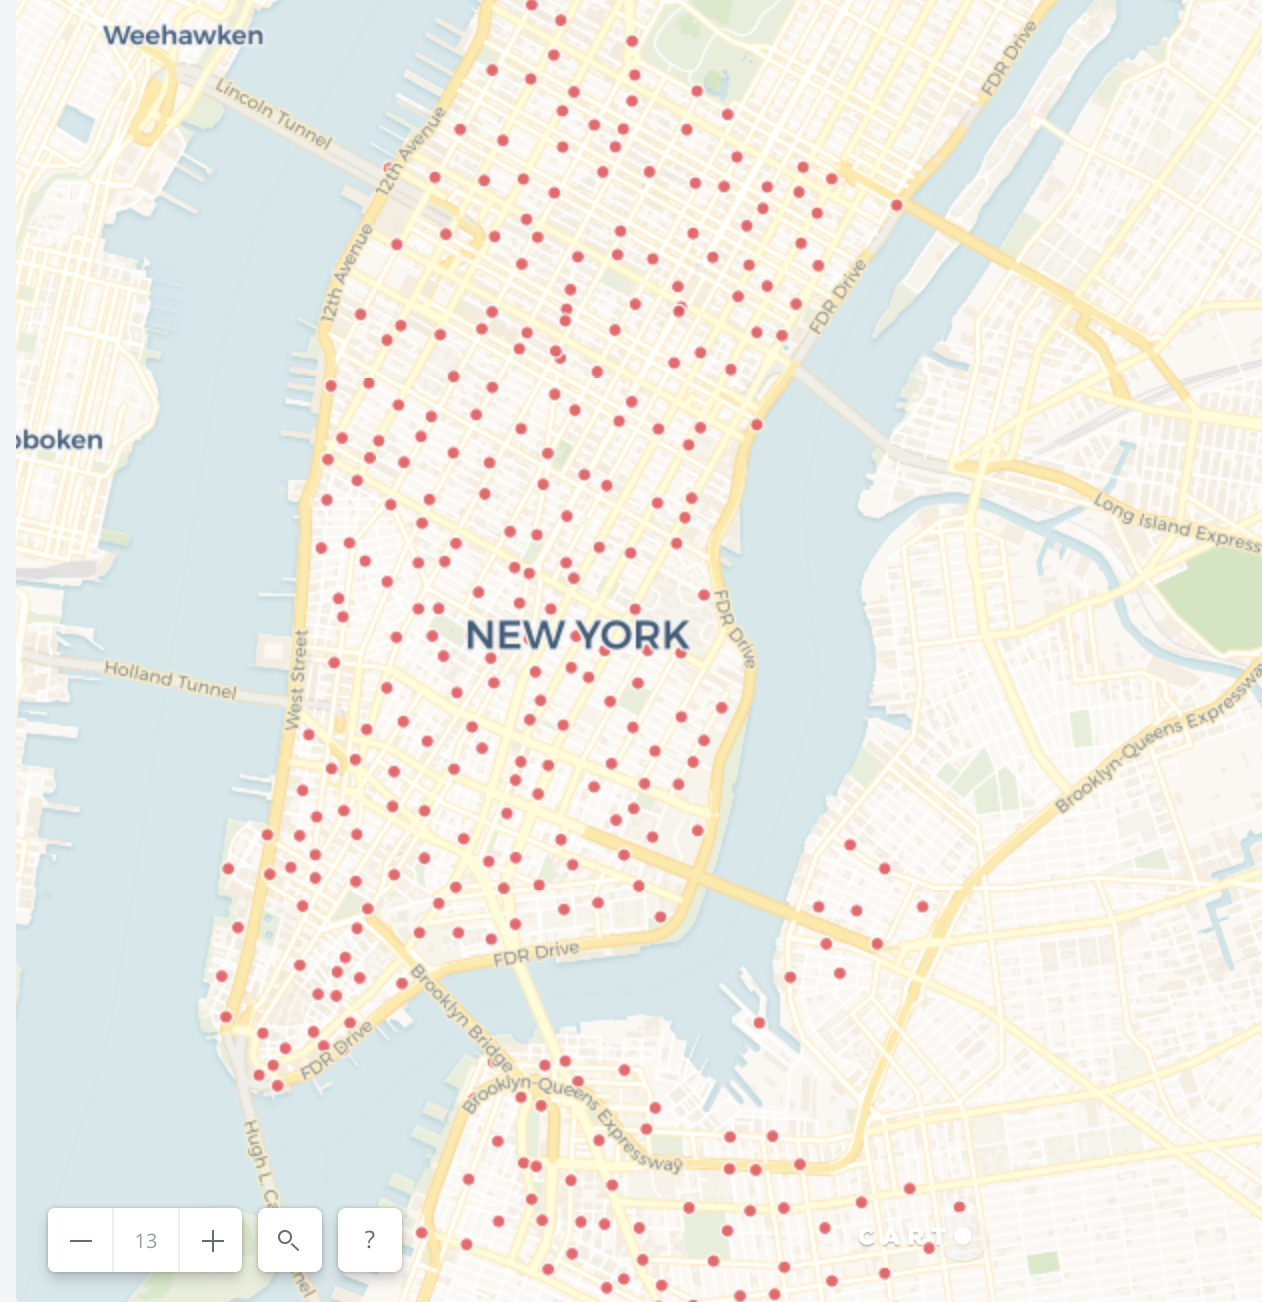

In [12]:
Image("https://raw.githubusercontent.com/valschi/PUI2017_vjs306/master/HW7_vjs306/all_stations.png", width=450, height=450)

Figure1: Map corresponding to Query #8, plotting the coordinates of all the unique originating stations

### Query #9

In [13]:
sQuery9 = '''
SELECT CDB_TransformToWebmercator(
           CDB_LatLng(start_station_latitude, 
                      start_station_longitude)) as the_geom_webmercator,
       MIN(cartodb_id) as cartodb_id 
FROM citibike
WHERE ST_DWithin(CDB_LatLng(start_station_latitude, 
                            start_station_longitude)::geography,
                 CDB_LatLng(40.7577, -73.9857)::geography,
                 500)
GROUP BY start_station_id, 
start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery9)), sep=',')

the_geom_webmercator  cartodb_id
0  0101000020110F0000F55695027D6B5FC186E5BB69D7FB...          33
1  0101000020110F00001607D538556B5FC119A6CA6F41FC...         124
2  0101000020110F000004AF971C1D6B5FC17A48F3C1A8FB...          54
3  0101000020110F00009BB87D02B76A5FC146C144E9E5FB...          19
4  0101000020110F0000F22A632FBE6A5FC1363A28CFADFB...        1115
5  0101000020110F00003F9300B2976B5FC1B8B88F3102FC...         783
6  0101000020110F000020D6742CE16A5FC112F4D73D73FC...          42

Table 10: Coordinates for the stations within 500 meters from Times Square

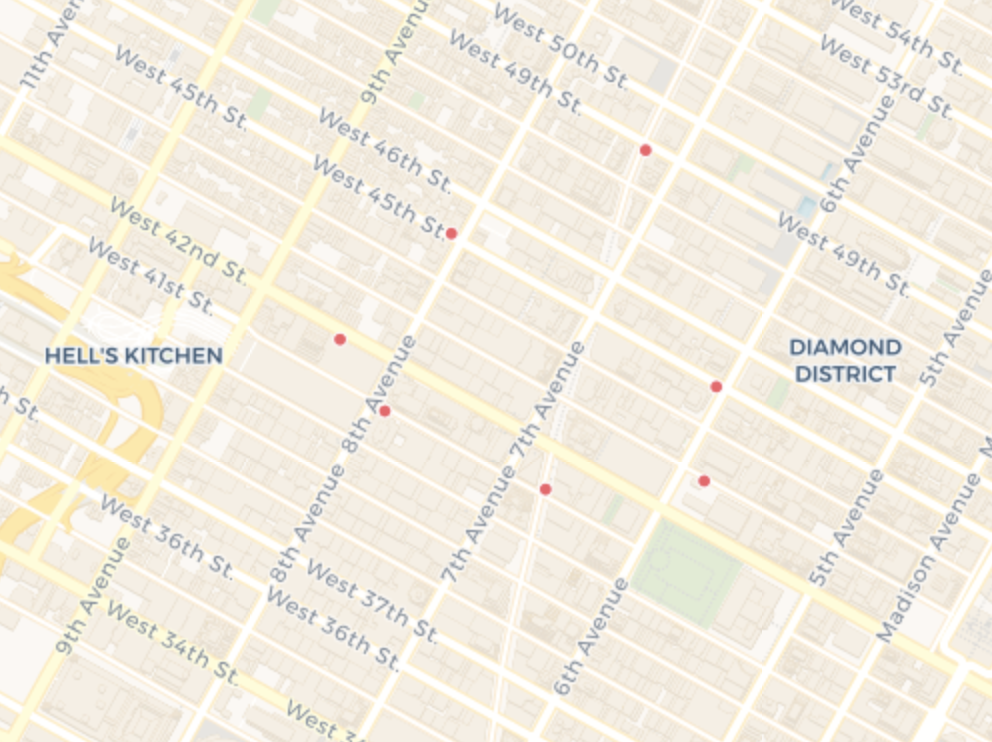

In [14]:
Image("https://raw.githubusercontent.com/valschi/PUI2017_vjs306/master/HW7_vjs306/stations%20times%20square.png", height = 450, width = 450)

Figure 2: Map corresponding to Query #9, plotting the stations within 500m of Times Square

### Query #10

In [15]:
sQuery10 = '''
SELECT CDB_TransformToWebmercator(
           CDB_LatLng(start_station_latitude, 
                      start_station_longitude)) as the_geom_webmercator,
       MIN(cartodb_id) as cartodb_id, 
       AVG(tripduration) as ta
FROM citibike
WHERE ST_DWithin(CDB_LatLng(start_station_latitude, 
                            start_station_longitude)::geography,
                 CDB_LatLng(40.7577, -73.9857)::geography,
                 500)
GROUP BY start_station_id, 
start_station_latitude, start_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery10)), sep=',')

the_geom_webmercator  cartodb_id          ta
0  0101000020110F0000F55695027D6B5FC186E5BB69D7FB...          33  652.753452
1  0101000020110F00001607D538556B5FC119A6CA6F41FC...         124  738.815603
2  0101000020110F000004AF971C1D6B5FC17A48F3C1A8FB...          54  648.023904
3  0101000020110F00009BB87D02B76A5FC146C144E9E5FB...          19  575.560284
4  0101000020110F0000F22A632FBE6A5FC1363A28CFADFB...        1115  605.696429
5  0101000020110F00003F9300B2976B5FC1B8B88F3102FC...         783  663.968326
6  0101000020110F000020D6742CE16A5FC112F4D73D73FC...          42  624.056338

Table 11: adding Average trip duration as ta to be able to add weight to the dots

### Query #11

In [16]:
sQuery11 = '''
SELECT ST_Makeline(
       CDB_TransformToWebmercator(
           CDB_LatLng(start_station_latitude, 
                      start_station_longitude)),
       CDB_TransformToWebmercator(
           CDB_LatLng(end_station_latitude, 
                      end_station_longitude))
       ) as the_geom_webmercator,          
       MIN(cartodb_id) as cartodb_id 
FROM citibike
WHERE ST_DWithin(CDB_LatLng(start_station_latitude, 
                            start_station_longitude)::geography,
                 CDB_LatLng(40.7577, -73.9857)::geography,
                 500)
GROUP BY start_station_id, start_station_latitude, start_station_longitude,
         end_station_id, end_station_latitude, end_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(sQuery11)), sep=',')

the_geom_webmercator  cartodb_id
0    0102000020110F00000200000020D6742CE16A5FC112F4...       18466
1    0102000020110F000002000000F55695027D6B5FC186E5...        2226
2    0102000020110F00000200000004AF971C1D6B5FC17A48...       15621
3    0102000020110F0000020000009BB87D02B76A5FC146C1...       34734
4    0102000020110F000002000000F22A632FBE6A5FC1363A...       37006
5    0102000020110F00000200000004AF971C1D6B5FC17A48...        6007
6    0102000020110F000002000000F22A632FBE6A5FC1363A...       20272
7    0102000020110F0000020000001607D538556B5FC119A6...       11540
8    0102000020110F0000020000009BB87D02B76A5FC146C1...       13614
9    0102000020110F000002000000F55695027D6B5FC186E5...       39800
10   0102000020110F00000200000004AF971C1D6B5FC17A48...       29033
11   0102000020110F00000200000020D6742CE16A5FC112F4...       45442
12   0102000020110F0000020000009BB87D02B76A5FC146C1...       14181
13   0102000020110F0000020000001607D538556B5FC119A6...         959
14   0102000020110F0000020000003F9300B2976B5FC1B8B8...        7889
15   0102000020110F0000020000009BB87D02B76A5FC146C1...        7076
16   0102000020110F0000020000001607D538556B5FC119A6...       33533
17   0102000020110F00000200000004AF971C1D6B5FC17A48...       34712
18   0102000020110F0000020000003F9300B2976B5FC1B8B8...       13230
19   0102000020110F000002000000F55695027D6B5FC186E5...        4507
20   0102000020110F000002000000F55695027D6B5FC186E5...       13031
21   0102000020110F000002000000F22A632FBE6A5FC1363A...       17712
22   0102000020110F0000020000009BB87D02B76A5FC146C1...       34501
23   0102000020110F000002000000F55695027D6B5FC186E5...        9844
24   0102000020110F000002000000F55695027D6B5FC186E5...         356
25   0102000020110F00000200000004AF971C1D6B5FC17A48...       10223
26   0102000020110F000002000000F55695027D6B5FC186E5...       25199
27   0102000020110F0000020000001607D538556B5FC119A6...        2536
28   0102000020110F000002000000F55695027D6B5FC186E5...       37521
29   0102000020110F000002000000F55695027D6B5FC186E5...       19530
..                                                 ...         ...
543  0102000020110F00000200000020D6742CE16A5FC112F4...       34099
544  0102000020110F00000200000020D6742CE16A5FC112F4...        7354
545  0102000020110F0000020000009BB87D02B76A5FC146C1...       16753
546  0102000020110F00000200000020D6742CE16A5FC112F4...       21315
547  0102000020110F000002000000F22A632FBE6A5FC1363A...       38470
548  0102000020110F000002000000F55695027D6B5FC186E5...       30699
549  0102000020110F00000200000004AF971C1D6B5FC17A48...       12092
550  0102000020110F0000020000009BB87D02B76A5FC146C1...       12625
551  0102000020110F0000020000001607D538556B5FC119A6...       22819
552  0102000020110F00000200000004AF971C1D6B5FC17A48...        8767
553  0102000020110F0000020000009BB87D02B76A5FC146C1...       14978
554  0102000020110F00000200000004AF971C1D6B5FC17A48...        7686
555  0102000020110F0000020000003F9300B2976B5FC1B8B8...        6699
556  0102000020110F000002000000F55695027D6B5FC186E5...       17638
557  0102000020110F000002000000F22A632FBE6A5FC1363A...       28510
558  0102000020110F0000020000009BB87D02B76A5FC146C1...       17023
559  0102000020110F0000020000009BB87D02B76A5FC146C1...        3105
560  0102000020110F00000200000020D6742CE16A5FC112F4...       13485
561  0102000020110F000002000000F55695027D6B5FC186E5...       13694
562  0102000020110F000002000000F55695027D6B5FC186E5...        2329
563  0102000020110F0000020000003F9300B2976B5FC1B8B8...        5582
564  0102000020110F000002000000F55695027D6B5FC186E5...       12873
565  0102000020110F000002000000F22A632FBE6A5FC1363A...       17983
566  0102000020110F0000020000001607D538556B5FC119A6...       22345
567  0102000020110F00000200000020D6742CE16A5FC112F4...       27219
568  0102000020110F0000020000001607D538556B5FC119A6...        7341
569  0102000020110F0000020000003F9300B2976B5FC1B8B8...        8971
570  0102000020110F000002000000F22A632FBE6A5FC1363A...       36545
571  010200002

Table 12: This will allow plot lines between the stations

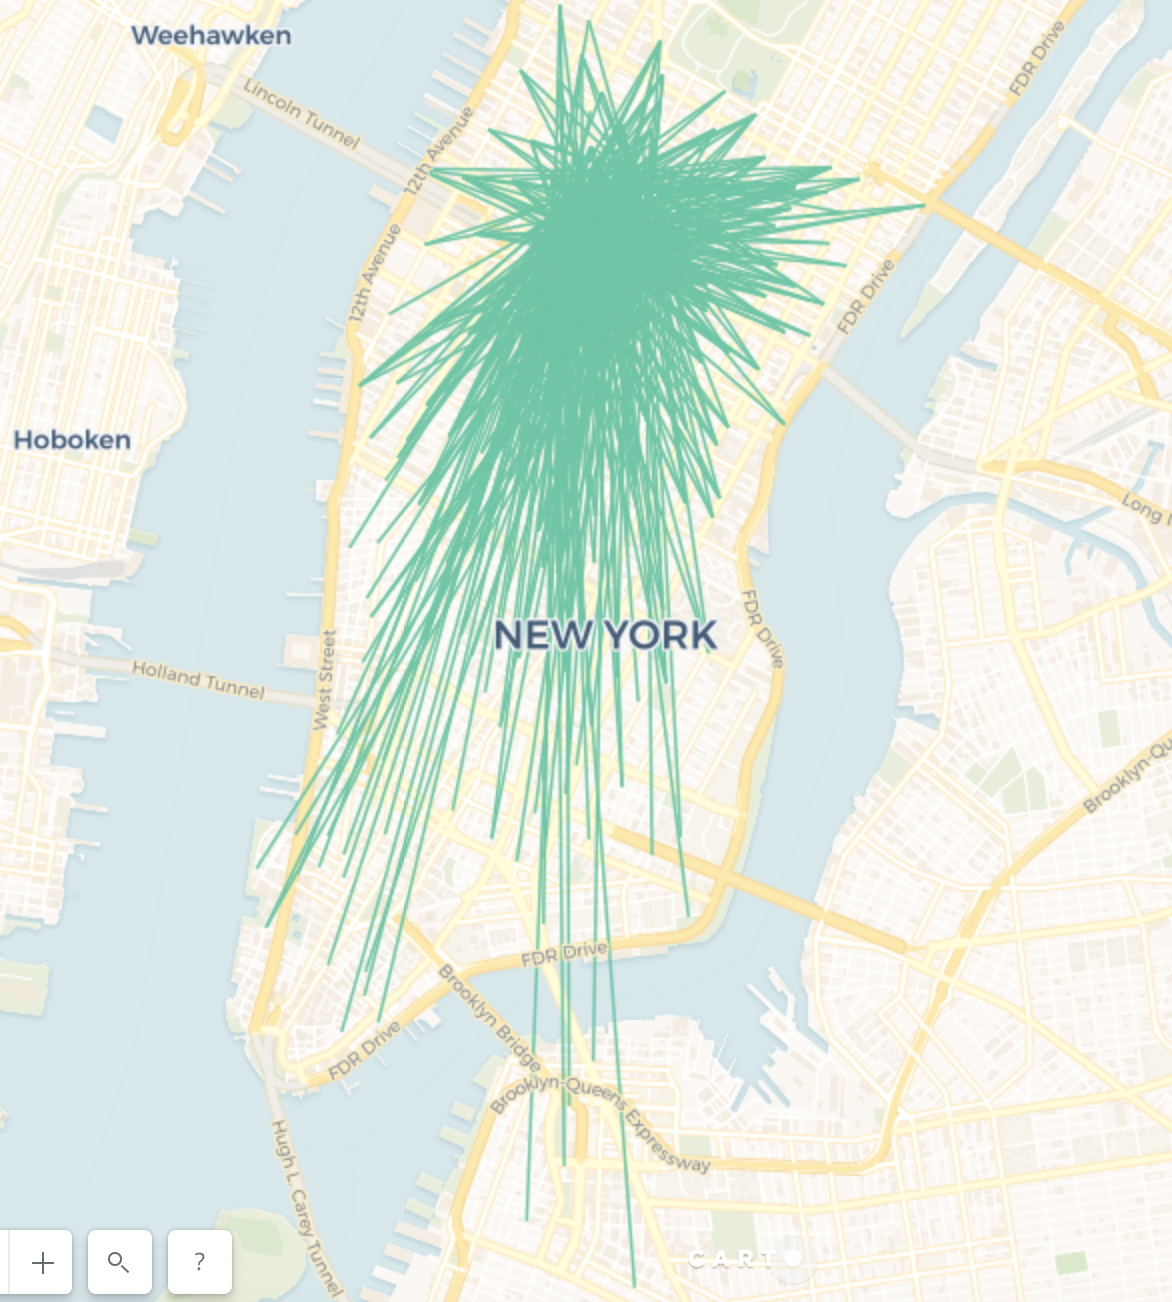

In [17]:
Image("https://raw.githubusercontent.com/valschi/PUI2017_vjs306/master/HW7_vjs306/bike%20lines.png", height = 450, width = 450)

Figure 3: Map corresponding to Query #11, drawing lines between stations